<img src='https://www.rc.colorado.edu/sites/all/themes/research/logo.png' style="height:75px">

# Plotting the Seal Data on a map

In [1]:
import os
import pandas as  pd
import numpy as np

In [2]:
df = pd.read_csv("seal-behav.csv", parse_dates=[1])
df.head(5)

,timestamp,longitude,latitude,individual,event-id,behavior
0,2011-06-15 17:35:18,-59.97949982,43.924957,E 87,677436629,0.344702
1,2011-06-15 17:50:19,-59.98273849,43.925488,E 87,677436630,-0.019864
2,2011-06-15 18:05:32,-59.98968887,43.925827,E 87,677436631,-2.261316
3,2011-06-15 18:21:27,-59.99033737,43.926136,E 87,677436632,0.856176
4,2011-06-15 18:36:31,-59.9889679,43.925255,E 87,677436633,-0.866216


### Selecting one seal

In [3]:
wd = df.pivot(index='timestamp', columns="individual") #row, column, values (optional)
f104 = df.ix[df["individual"] == "F104"]
f104.head()

,timestamp,longitude,latitude,individual,event-id,behavior
26206,2011-06-15 17:03:12,-59.98400116,43.925816,F104,643021737,0.514805
26207,2011-06-15 17:19:25,-59.98004532,43.924236,F104,643021738,0.272955
26208,2011-06-15 17:35:57,-59.97705078,43.925224,F104,643021739,0.495066
26209,2011-06-15 17:52:48,-59.97263336,43.924267,F104,643021740,-0.085501
26210,2011-06-15 18:07:57,-59.97813416,43.925846,F104,643021741,0.100912


### Plotting the seal path

Several steps:
1. Create a map centered around the region
2. Draw coastlines
3. Draw countries
4. Fill oceans and coastline
5. Draw the oberservations of the seal on map

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

### Drawing an empty map of the region

In [7]:
f104.dtypes

timestamp      object
longitude      object
latitude      float64
individual     object
event-id        int64
behavior      float64
dtype: object

In [9]:
lons = f104["longitude"].values
lons = lons.astype(np.float)
lats = f104["latitude"].values
lons_c=np.average(lons)
lats_c=np.average(lats)
print (lons_c, lats_c)

(-60.215205263449604, 44.182538132720715)


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


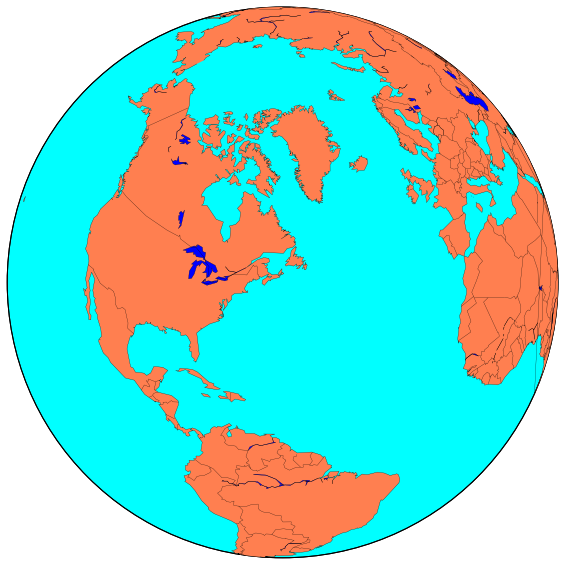

In [10]:
#
map = Basemap(projection='ortho', lat_0=lats_c,lon_0=lons_c)

fig=plt.figure(figsize=(12,9))
ax = fig.add_axes([0.05,0.05,0.9,0.85])

# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='blue')

# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')


### Plotting  seal observations

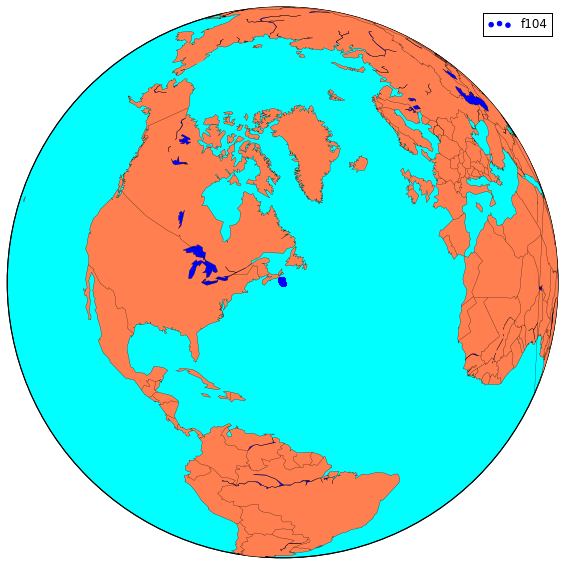

In [11]:
#
map = Basemap(projection='ortho', lat_0=lats_c,lon_0=lons_c)

fig=plt.figure(figsize=(12,9))
ax = fig.add_axes([0.05,0.05,0.9,0.85])

# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='blue')

# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')

# Seal 281
x, y = map(lons,lats)
map.scatter(x,y,color='b',label='f104')

plt.legend()

### Plot all  observations

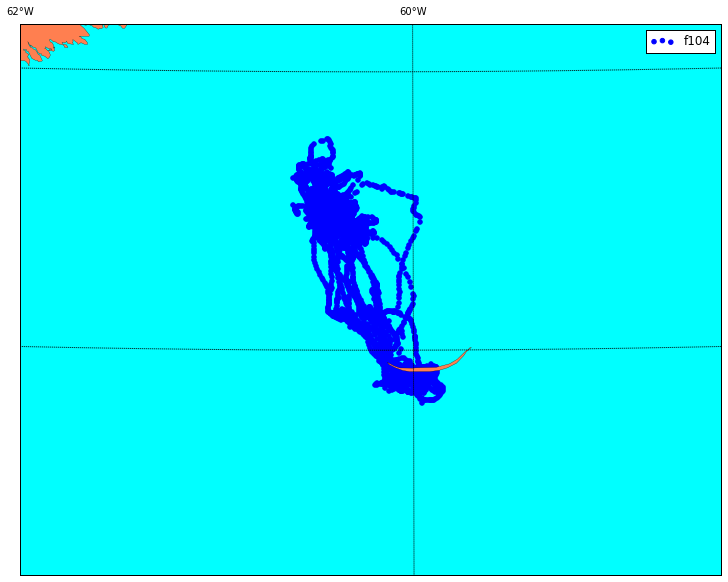

In [12]:
#
map = Basemap(width=280000,height=220000,projection='lcc', resolution='h',
              lat_0=lats_c,lon_0=lons_c)

fig=plt.figure(figsize=(12,9))
ax = fig.add_axes([0.05,0.05,0.9,0.85])

# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='blue')

# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')

# create a grid 
# draw lat/lon grid lines every 2 degrees.
map.drawmeridians(np.arange(0,360,2), labels=[False, True, True, False])
map.drawparallels(np.arange(-90,90,1), lables=[True, False, False, True])

# Seal f104
x, y = map(lons,lats)
map.scatter(x,y,color='b',label='f104')

plt.legend()